# Before we start with the code

- This workshop should give you good intuition about training ML model
- How to start
- Basic process
- Ideas can be used in your business/school problems

Very important for you: https://www.kaggle.com/

- All datasets are obtained from kaggle
- kernels with solutions
- It is important to understand these kernels their structure

This notebook is an example of a kernel. It's a mix of kernels from kaggle (sources at the end of notebook).

Focus mostly on methods and implementation from this kernel: https://www.kaggle.com/angps95/fifa-world-cup-2018-prediction/
which i found most interesting 

In [1]:
import random
import numpy as np 
import scipy as sp 
from scipy.stats import poisson
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
results = pd.read_csv("./data/results.csv")
world_cup = pd.read_csv("./data/World Cup 2018 Dataset.csv")
squads = pd.read_csv("./data/2018 FIFA World Cup Squads.csv")
rankings = pd.read_csv("./data/fifa_ranking.csv")

# Let's look at our main datasets (EDA ?)

In [3]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [5]:
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


How would you start this whole process ?

- __EDA__
- __Data cleaning__

We should use both combination of them at the start think both :)

# 2. Data cleaning
Not much time, so we will talk mostly about data cleaning (in our case)

When you saw these datasets how would you start ?

- Get rid of unwanted columns
- We would like to connect somehow the datasets - Check for consistency
- Check types
- Missing data
- Duplicates
...

In [6]:
# Our table - used for prediction of group-stage
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({"IRAN": "Iran", 
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "South Korea"})
world_cup.head(4)

,Team,Group,First match against,Second match against,Third match against
0,Russia,A,Saudi Arabia,Egypt,Uruguay
1,Saudi Arabia,A,Russia,Uruguay,Egypt
2,Egypt,A,Uruguay,Russia,Saudi Arabia
3,Uruguay,A,Egypt,Saudi Arabia,Russia


In [7]:
# Check consistency
results =  results.replace({'Germany DR': 'Germany', 'China': 'China PR'})

__First challenge!__

In [8]:
# Check types
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [129]:
# Execution Ctrl + Enter or Run

# Fix the date format - This time we where a bit predictive (we would need to use time so we need datetime format)

#

In [10]:
# Much better
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [11]:
# Remove unwanted columns
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
# Check for consistency
rankings = rankings.replace({"IR Iran": "Iran", "Korea Republic":"South Korea"})

# Check types - Fixing datetime
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

In [12]:
world_cup.head()

,Team,Group,First match against,Second match against,Third match against
0,Russia,A,Saudi Arabia,Egypt,Uruguay
1,Saudi Arabia,A,Russia,Uruguay,Egypt
2,Egypt,A,Uruguay,Russia,Saudi Arabia
3,Uruguay,A,Egypt,Saudi Arabia,Russia
4,Portugal,B,Spain,Morocco,Iran


In [13]:
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0


In [14]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


The main training set is results, do we really need knowledge from all these matches ? 

__Let's discuss this! :)__

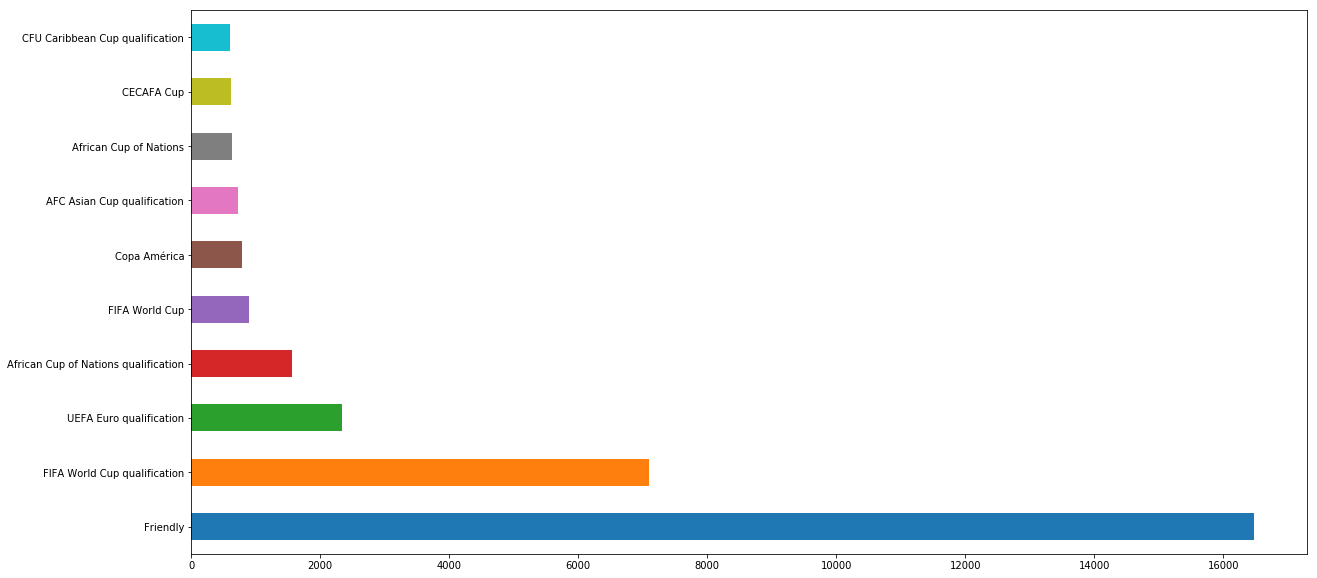

In [15]:
results['tournament'].value_counts()[:10].plot(kind="barh", figsize=(20,10))

I think friendly matches are not suitable for our problem

Delele those friendly games ! :)

In [ ]:
# TODO coding challenge

#

In [17]:
# Let's look at rankings again
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0


What can we do with the current and previous years rankings (columns)? 
A taste of feature engineering!

__Challenge!__ (don't worry very simple)

Hints:
- Create new column let's call it - "weighted_points"

In [18]:
### Your code - rankings['weighted_points'] = ...

###

In [20]:
# Yay :)
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0,0.0


Why couldn't we just let those columns why we add another ?

Later on we will drop those 3 columns and we stay only with the weighted points.
Why?
Yes, we can just create more and more features!
But.
Ever heard of curse of dimensionality ?

#### Q: Look at the data set for rankings and results is there a way to connect them? How?

In [5]:
# Area for your exploration of dataset











#

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
1,2,Italy,ITA,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
2,3,Switzerland,SUI,0.00,50,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
3,4,Sweden,SWE,0.00,55,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
4,5,Argentina,ARG,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.00,54,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
6,7,Russia,RUS,0.00,52,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
7,8,Brazil,BRA,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.00,49,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
9,10,Denmark,DEN,0.00,51,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08


Hint:
- There are no rankings for matches that was played in year 1872.

For rankings and results(rankings points only starts after 2011-08-24), use data after year 2011-08-24

__Now we can joins the datasets__

Finally!

In [87]:
from datetime import datetime

pd.to_datetime(rankings['rank_date'])
pd.to_datetime(results['date'])

rankings['year'] = rankings['rank_date'].dt.year
results['year'] = results['date'].dt.year

rankings_sub = rankings[rankings['rank_date'] >= '2011-08-24']
results_sub = results[results['date'] >= '2011-08-24']

#### What should we do now? Any ideas?

1. Drop redundunt columns and group average points by year
2. Merge results and rankings by year

In [88]:
# Drop those 3 columns as mentioned earlier
rankings_sub = rankings_sub[['rank', 'country_full', 'weighted_points', 'year']]

# Join average rank and avg. weighted points for every team for each year
rankings_sub = rankings_sub.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'weighted_points': 'mean'})

In [89]:
# This is how it looks
rankings_sub.head(10)

,year,country_full,weighted_points,rank
0,2011,Afghanistan,74.374,180.6
1,2011,Albania,323.618,69.6
2,2011,Algeria,529.376,37.4
3,2011,American Samoa,12.142,199.8
4,2011,Andorra,0.000,203.8
5,2011,Angola,298.242,86.6
6,2011,Anguilla,8.506,198.6
7,2011,Antigua and Barbuda,329.338,93.4
8,2011,Argentina,636.456,9.8
9,2011,Armenia,450.040,50.6


__Now to the joining__

In [110]:
results_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33140,2011-08-27,Fiji,Tahiti,3,0,South Pacific Games,Boulari,New Caledonia,True,2011
33142,2011-08-27,New Caledonia,Vanuatu,5,0,South Pacific Games,Nouméa,New Caledonia,False,2011
33144,2011-08-27,Papua New Guinea,Cook Islands,4,0,South Pacific Games,Boulari,New Caledonia,True,2011
33145,2011-08-27,Solomon Islands,Guam,7,0,South Pacific Games,Nouméa,New Caledonia,True,2011
33146,2011-08-27,Tuvalu,American Samoa,4,0,South Pacific Games,Nouméa,New Caledonia,True,2011


__Join rankings on column year__

In [91]:
results_all = results_sub.merge(rankings_sub, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
results_all = results_all.merge(rankings_sub, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
results_all.drop(['date', 'tournament', 'city', 'country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)

# Result of our data cleaning :)
results_all.head()

,home_team,away_team,home_score,away_score,neutral,weighted_points_x,rank_x,weighted_points_y,rank_y
0,Fiji,Tahiti,3,0,True,152.618,151.2,63.320,183.0
1,New Caledonia,Tahiti,3,1,False,115.760,161.0,63.320,183.0
2,New Caledonia,Vanuatu,5,0,False,115.760,161.0,94.624,170.8
3,American Samoa,Vanuatu,0,8,True,12.142,199.8,94.624,170.8
4,Guam,Vanuatu,1,4,True,30.720,190.2,94.624,170.8


In [111]:
print("Number of training examples (rows): "+str(results_all.shape[0]))

Number of training examples (rows): 3387


# 3. Feature Engineering

Do you have any ideas? :)  

__Let's do a challenge__

- Create at least one new feature(column) from the dataset that we have

In [27]:
### Your code results_all['name_of_column'] = ...

###

#### Get(Home - Away):
- weighted difference
- rank difference
- one-hot-encode neutral (importance of a match)

and of course don't forget to create:

- targets

In [92]:
results_all['weighted_diff'] = results_all['weighted_points_x'] - results_all['weighted_points_y']
results_all['rank_diff'] = results_all['rank_x'] - results_all['rank_y']
results_all['neutral'] = results_all['neutral'].astype(int)
#results_all['is_win'] = (results_all['home_score'] - results_all['away_score']).apply(lambda x: 1 if x>0 else 0)
results_all['is_win'] = np.where(results_all["home_score"] < results_all["away_score"], 0, np.where(results_all["home_score"]==results_all["away_score"],1,2))
### Our Train dataset
train = results_all.drop(['home_team', 'away_team', 'home_score', 'away_score'], axis=1)
train.head()

,neutral,weighted_points_x,rank_x,weighted_points_y,rank_y,weighted_diff,rank_diff,is_win
0,1,152.618,151.2,63.320,183.0,89.298,-31.8,2
1,0,115.760,161.0,63.320,183.0,52.440,-22.0,2
2,0,115.760,161.0,94.624,170.8,21.136,-9.8,2
3,1,12.142,199.8,94.624,170.8,-82.482,29.0,0
4,1,30.720,190.2,94.624,170.8,-63.904,19.4,0


Looking at the new features, could you come up with some additional features? Maybe something we could look up on the internet

## Imports for Training and Evaluation
First the libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
import scikitplot as skplt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# 4. Building classification models

- Logistic Regression
- SVM
- K-Nearest Neighbour
- Decision Tree
- Random Forest
- XGBoosting

#### Firstly we need to separate our data to inputs and their targets

In [30]:
### Inputs
x = train.drop('is_win', axis=1)

### Targets
y = train['is_win']

### 4.1 Splitting into training and test set

We shall use 80% of our dataset as our training set and 20% as our test set. We will also apply 5-fold Cross Validation

Why do we do this ? Why we simple not use the whole dataset ?

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

##### Let's define some function to evaluate our models

In [32]:
def train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy")),2)

def test_acc_score(model):
    return round(accuracy_score(y_test, model.predict(x_test)),2)

def train_prec_score(model):
    return round(precision_score(y_train,model.predict(x_train),average='macro'),2)

def test_prec_score(model):
    return round(precision_score(y_test,model.predict(x_test),average='macro'),2)

def train_f1(model):
    return round(f1_score(y_train,model.predict(x_train),average='macro'),2)

def test_f1(model):
    return round(f1_score(y_test,model.predict(x_test),average='macro'),2)

def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm.index=["Actual Away Win","Actual Draw","Actual Home Win"]
    return cm.T

def confusion_matrix_model_train(model_used):
    cm=confusion_matrix(y_train,model_used.predict(x_train))
    col=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm.index=["Actual Away Win","Actual Draw","Actual Home Win"]
    return cm.T

def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(6,6))

### 4.2 Building classification models for the predict of results
The models will be optimised using GridSearchCV based on F1 score. F1 score gives a weighted average between precision and accuracy/recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

I have typed in some of the optimised parameters based on the GridSearchCV code output, then commented out the GridSearchCV codes to make the notebook run faster as it won't be re-optimised.

Confusion matrix table and details will only be shown for the final selected models in order to save space. There would be a summary of each models in the evaluation section below

#### Logistic Regression (Lasso)

In [33]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
log_reg1 = GridSearchCV(LogisticRegression(penalty="l1"), param_grid = param_grid, scoring = "f1_macro")
#log_reg1 = LogisticRegression(penalty = "l1")
log_reg1.fit(x_train,y_train)
print(log_reg1.best_params_)
print("In-sample accuracy: " + str(train_acc_score(log_reg1)))
print("Test accuracy: " + str(test_acc_score(log_reg1)))
print ("In-sample Precision Score: " + str(train_prec_score(log_reg1)))
print ("Test Precision Score: " + str(test_prec_score(log_reg1)))
print ("In-sample F1 Score: " + str(train_f1(log_reg1)))
print ("Test F1 Score: " + str(test_f1(log_reg1)))
confusion_matrix_model_train(log_reg1)

{'C': 1}
In-sample accuracy: 0.62
Test accuracy: 0.63
In-sample Precision Score: 0.56
Test Precision Score: 0.42
In-sample F1 Score: 0.46
Test F1 Score: 0.46


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,530,240,157
Predicted Draw,4,5,2
Predicted Home Win,241,389,1141


#### Logistic Regression (Ridge)

In [34]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
log_reg2 = GridSearchCV(LogisticRegression(penalty="l2"),param_grid=param_grid,scoring="f1_macro")
#log_reg2=LogisticRegression(penalty="l2",C=0.01)
log_reg2.fit(x_train,y_train)
print(log_reg2.best_params_)
print("In-sample accuracy: " + str(train_acc_score(log_reg2)))
print("Test accuracy: " + str(test_acc_score(log_reg2)))
print ("In-sample Precision Score: " + str(train_prec_score(log_reg2)))
print ("Test Precision Score: " + str(test_prec_score(log_reg2)))
print ("In-sample F1 Score: " + str(train_f1(log_reg2)))
print ("Test F1 Score: " + str(test_f1(log_reg2)))
confusion_matrix_model_train(log_reg2)

{'C': 1}
In-sample accuracy: 0.62
Test accuracy: 0.63
In-sample Precision Score: 0.52
Test Precision Score: 0.42
In-sample F1 Score: 0.46
Test F1 Score: 0.47


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,531,242,158
Predicted Draw,2,1,0
Predicted Home Win,242,391,1142


#### SVM (RBF Kernel)

In [35]:
#param_grid = dict(C=(0.001,0.01,0.1,0.5,1,2),gamma=(0.001,0.01,0.1,0.5,1,2))
#svc_rbf = GridSearchCV(SVC(kernel="rbf",random_state=0),param_grid=param_grid,scoring="f1_macro")
svc_rbf = SVC(kernel='rbf', gamma=0.001, C=0.5,random_state=0)
svc_rbf.fit(x_train, y_train)
#print(svc_rbf.best_params_)
print("In-sample accuracy: " + str(train_acc_score(svc_rbf)))
print("Test accuracy: " + str(test_acc_score(svc_rbf)))
print ("In-sample Precision Score: " + str(train_prec_score(svc_rbf)))
print ("Test Precision Score: " + str(test_prec_score(svc_rbf)))
print ("In-sample F1 Score: " + str(train_f1(svc_rbf)))
print ("Test F1 Score: " + str(test_f1(svc_rbf)))
confusion_matrix_model_train(svc_rbf)

In-sample accuracy: 0.55
Test accuracy: 0.58
In-sample Precision Score: 0.78
Test Precision Score: 0.53
In-sample F1 Score: 0.6
Test F1 Score: 0.44


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,549,131,50
Predicted Draw,7,106,4
Predicted Home Win,219,397,1246


#### SVM (Linear Kernel)

In [36]:
import time
start_time = time.time()

#param_grid = dict(C=(0.001,0.01,0.1,0.5,1,2),gamma=(0.001,0.01,0.1,0.5,1,2))
#svc_lin= GridSearchCV(SVC(kernel="linear",random_state=0),param_grid=param_grid,scoring="f1_macro", n_jobs=-1)
svc_lin = SVC(kernel='linear', gamma=0.001, C=0.1,random_state=0)
svc_lin.fit(x_train, y_train)
#print(svc_lin.best_params_)
print("In-sample accuracy: " + str(train_acc_score(svc_lin)))
print("Test accuracy: " + str(test_acc_score(svc_lin)))
print ("In-sample Precision Score: " + str(train_prec_score(svc_lin)))
print ("Test Precision Score: " + str(test_prec_score(svc_lin)))
print ("In-sample F1 Score: " + str(train_f1(svc_lin)))
print ("Test F1 Score: " + str(test_f1(svc_lin)))
confusion_matrix_model_train(svc_lin)

print("--- %s seconds ---" % (time.time() - start_time))

In-sample accuracy: 0.62
Test accuracy: 0.62
In-sample Precision Score: 0.52
Test Precision Score: 0.5
In-sample F1 Score: 0.47
Test F1 Score: 0.47
--- 106.16240859031677 seconds ---


#### K-Nearest Neighbour

In [37]:
#param_grid = dict(n_neighbors=np.arange(10,70),weights=("uniform","distance"),p=(1,2))
#KNN = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,scoring="f1_macro")
KNN=KNeighborsClassifier(n_neighbors=16,p=1,weights='uniform')
KNN.fit(x_train,y_train)
#print(KNN.best_params_)
print("In-sample accuracy: " + str(train_acc_score(KNN)))
print("Test accuracy: " + str(test_acc_score(KNN)))
print ("In-sample Precision Score: " + str(train_prec_score(KNN)))
print ("Test Precision Score: " + str(test_prec_score(KNN)))
print ("In-sample F1 Score: " + str(train_f1(KNN)))
print ("Test F1 Score: " + str(test_f1(KNN)))
confusion_matrix_model_train(KNN)

In-sample accuracy: 0.6
Test accuracy: 0.6
In-sample Precision Score: 0.61
Test Precision Score: 0.51
In-sample F1 Score: 0.58
Test F1 Score: 0.51


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,523,175,130
Predicted Draw,73,161,86
Predicted Home Win,179,298,1084


#### Decision Tree

In [38]:
#param_grid = dict(max_depth=np.arange(4,10),min_samples_leaf=np.arange(1,8),min_samples_split=np.arange(2,8),max_leaf_nodes=np.arange(30,100,10))
#Dec_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,scoring="f1_macro")
Dec_tree=DecisionTreeClassifier(max_depth= 8, max_leaf_nodes= 40, min_samples_leaf= 1, min_samples_split= 7)
Dec_tree.fit(x_train,y_train)
#print(Dec_tree.best_params_)
print("In-sample accuracy: " + str(train_acc_score(Dec_tree)))
print("Test accuracy: " + str(test_acc_score(Dec_tree)))
print ("In-sample Precision Score: " + str(train_prec_score(Dec_tree)))
print ("Test Precision Score: " + str(test_prec_score(Dec_tree)))
print ("In-sample F1 Score: " + str(train_f1(Dec_tree)))
print ("Test F1 Score: " + str(test_f1(Dec_tree)))
confusion_matrix_model_train(Dec_tree)

In-sample accuracy: 0.58
Test accuracy: 0.61
In-sample Precision Score: 0.65
Test Precision Score: 0.48
In-sample F1 Score: 0.54
Test F1 Score: 0.48


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,563,214,125
Predicted Draw,18,69,21
Predicted Home Win,194,351,1154


#### Random Forest

In [40]:
#param_grid = dict(max_depth=np.arange(3,10),min_samples_leaf=np.arange(1,10),min_samples_split=np.arange(2,6),max_leaf_nodes=np.arange(50,120,10))
#param_grid = dict(n_estimators = np.arange(50,500,50))
#ranfor = GridSearchCV(RandomForestClassifier(max_depth= 7, max_leaf_nodes=50, min_samples_leaf= 7, min_samples_split= 4,random_state=0),param_grid=param_grid,scoring="f1_macro")
ranfor = RandomForestClassifier(n_estimators=50,max_depth= 7, max_leaf_nodes=50, min_samples_leaf= 7, min_samples_split= 4,random_state=0)
ranfor.fit(x_train,y_train)
#print(ranfor.best_params_)
print("In-sample accuracy: " + str(train_acc_score(ranfor)))
print("Test accuracy: " + str(test_acc_score(ranfor)))
print ("In-sample Precision Score: " + str(train_prec_score(ranfor)))
print ("Test Precision Score: " + str(test_prec_score(ranfor)))
print ("In-sample F1 Score: " + str(train_f1(ranfor)))
print ("Test F1 Score: " + str(test_f1(ranfor)))
confusion_matrix_model_train(ranfor)

In-sample accuracy: 0.61
Test accuracy: 0.62
In-sample Precision Score: 0.68
Test Precision Score: 0.51
In-sample F1 Score: 0.57
Test F1 Score: 0.49


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,562,196,118
Predicted Draw,22,99,19
Predicted Home Win,191,339,1163


#### XGBoosting

In [41]:
#param_grid = dict(n_estimators=np.arange(50,500,50),max_depth=np.arange(6,12),learning_rate=(0.0001,0.001,0.01,0.1))
#xgclass = GridSearchCV(xgb.XGBClassifier(random_state=0),param_grid=param_grid,scoring="f1_macro")
xgclass = xgb.XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01)
xgclass.fit(x_train,y_train)
#print(xgclass.best_params_)
print("In-sample accuracy: " + str(train_acc_score(xgclass)))
print("Test accuracy: " + str(test_acc_score(xgclass)))
print ("In-sample Precision Score: " + str(train_prec_score(xgclass)))
print ("Test Precision Score: " + str(test_prec_score(xgclass)))
print ("In-sample F1 Score: " + str(train_f1(xgclass)))
print ("Test F1 Score: " + str(test_f1(xgclass)))
confusion_matrix_model_train(xgclass)

In-sample accuracy: 0.6
Test accuracy: 0.61
In-sample Precision Score: 0.91
Test Precision Score: 0.52
In-sample F1 Score: 0.87
Test F1 Score: 0.51


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,720,67,17
Predicted Draw,10,421,5
Predicted Home Win,45,146,1278


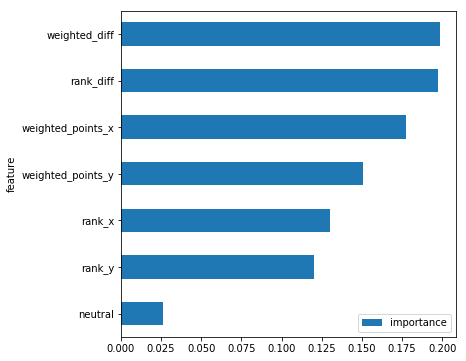

In [42]:
importance_of_features(xgclass)

### 4.3 Evaluation for models predicting results

In [43]:
Classifiers=["Logistic Regression (Lasso)","Logistic Regression (Ridge)","Support Vector Machine (RBF)","Support Vector Machine(Linear)","K-Nearest Neighbours","Decision Tree","Random Forest","XGBoost"]
in_sample_acc=[round(train_acc_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
test_acc=[round(test_acc_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
train_prec = [round(train_prec_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
test_prec = [round(test_prec_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
trainf1 = [train_f1(x) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
testf1 = [test_f1(x) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
cols=["Classifier","Training Accuracy","Test Accuracy","Training Precision","Test Precision","Training F1 Score","Test F1 Score"]
pred_results = pd.DataFrame(columns=cols)
pred_results["Classifier"]=Classifiers
pred_results["Training Accuracy"]=in_sample_acc
pred_results["Test Accuracy"]=test_acc
pred_results["Training Precision"]=train_prec
pred_results["Test Precision"]=test_prec
pred_results["Training F1 Score"]=trainf1
pred_results["Test F1 Score"]=testf1
pred_results

,Classifier,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training F1 Score,Test F1 Score
0,Logistic Regression (Lasso),0.62,0.63,0.56,0.42,0.46,0.46
1,Logistic Regression (Ridge),0.62,0.63,0.52,0.42,0.46,0.47
2,Support Vector Machine (RBF),0.55,0.58,0.78,0.53,0.60,0.44
3,Support Vector Machine(Linear),0.62,0.62,0.52,0.50,0.47,0.47
4,K-Nearest Neighbours,0.60,0.60,0.61,0.51,0.58,0.51
5,Decision Tree,0.58,0.61,0.65,0.48,0.54,0.48
6,Random Forest,0.61,0.62,0.68,0.51,0.57,0.49
7,XGBoost,0.60,0.61,0.91,0.52,0.87,0.51


##### K-fold cross validation - for XGBoost

Prediction for the entire dataset in __res__ constructed from out-of-fold predictions, and an estimate for the __F1 score in score__.

In [80]:
numFolds = 5
k_fold = KFold(n_splits=numFolds, shuffle=True, random_state=0)

#param_grid = dict(n_estimators=np.arange(50,500,50),max_depth=np.arange(6,12),learning_rate=(0.0001,0.001,0.01,0.1))
#xgclass = GridSearchCV(xgb.XGBClassifier(random_state=0),param_grid=param_grid,scoring="f1_macro")
xgclass = xgb.XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01)

res = np.zeros(len(x))
score = 0.0

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgclass.fit(x_train, y_train)

    res[test_index] = xgclass.predict(x_test)
    score += f1_score(y_test, res[test_index], average='macro')
score /= numFolds
print("F1 score: " + str(score))

F1 score: 0.49660992863695774


##### SVM (Linear kernel)

In [81]:
numFolds = 5
k_fold = KFold(n_splits=numFolds, shuffle=True, random_state=0)

# param_grid = dict(C=(0.001,0.01,0.1,0.5,1,2),gamma=(0.001,0.01,0.1,0.5,1,2))
# svc_lin= GridSearchCV(SVC(kernel="linear",random_state=0),param_grid=param_grid,scoring="f1_macro")
svc_lin = SVC(kernel='linear', gamma=0.001, C=0.1,random_state=0)

res = np.zeros(len(x))
score = 0.0

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc_lin.fit(x_train, y_train)

    res[test_index] = svc_lin.predict(x_test)
    score += f1_score(y_test, res[test_index], average='macro')
score /= numFolds
print("F1 score: " + str(score))

F1 score: 0.45976671765100197


##### Random Forest

In [82]:
numFolds = 5
k_fold = KFold(n_splits=numFolds, shuffle=True, random_state=0)

#param_grid = dict(max_depth=np.arange(3,10),min_samples_leaf=np.arange(1,10),min_samples_split=np.arange(2,6),max_leaf_nodes=np.arange(50,120,10))
#param_grid = dict(n_estimators = np.arange(50,500,50))
#ranfor = GridSearchCV(RandomForestClassifier(max_depth= 7, max_leaf_nodes=50, min_samples_leaf= 7, min_samples_split= 4,random_state=0),param_grid=param_grid,scoring="f1_macro")
ranfor = RandomForestClassifier(n_estimators=50,max_depth= 7, max_leaf_nodes=50, min_samples_leaf= 7, min_samples_split= 4,random_state=0)

res = np.zeros(len(x))
score = 0.0

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ranfor.fit(x_train, y_train)

    res[test_index] = ranfor.predict(x_test)
    score += f1_score(y_test, res[test_index], average='macro')
score /= numFolds
print("F1 score: " + str(score))

F1 score: 0.4854646041028071


# 5. Prediction of World Cup - Just (W/L/D)

__Group stage simulation__

In [44]:
world_cup_rankings = world_cup[['Team', 'Group']]
world_cup_rankings = world_cup_rankings.merge(rankings_sub[rankings_sub['year']==2018], left_on='Team', right_on='country_full')
world_cup_rankings.drop('country_full', axis=1, inplace=True)
world_cup_rankings = world_cup_rankings.set_index('Team')
world_cup_rankings

,Group,year,weighted_points,rank
Team,,,,
Russia,A,2018,417.961667,64.666667
Saudi Arabia,A,2018,313.558333,67.000000
Egypt,A,2018,408.813333,42.333333
Uruguay,A,2018,682.571667,19.000000
Portugal,B,2018,1005.245000,3.500000
Spain,B,2018,912.925000,7.333333
Morocco,B,2018,504.263333,41.333333
Iran,B,2018,520.541667,34.833333
France,C,2018,755.330000,8.000000


In [47]:
from itertools import combinations

world_cup_rankings['points'] = 0
world_cup_rankings['total_prob'] = 0

for group in world_cup_rankings['Group'].unique():
    print('*******************************')
    print('Simulating Group', group)
    group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
    
    for home, away in combinations(group_teams, 2):
        print('########################')
        print('{} vs {}'.format(home, away))
        
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, np.nan,np.nan,np.nan,np.nan]]), columns=x_test.columns)
        row.loc[0, 'neutral'] = 1
        row['weighted_points_x'] = world_cup_rankings.loc[home, 'weighted_points']
        row['rank_x'] = world_cup_rankings.loc[home, 'rank']
        row['weighted_points_y'] = world_cup_rankings.loc[away, 'weighted_points']
        row['rank_y'] = world_cup_rankings.loc[away, 'rank']
        row['weighted_diff'] = row['weighted_points_x'] - row['weighted_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        
        home_win_prob = xgclass.predict_proba(row)[:,2][0]
        away_win_prob = xgclass.predict_proba(row)[:,0][0]
        draw_prob = xgclass.predict_proba(row)[:,1][0]
        
        if max(home_win_prob,away_win_prob,draw_prob) == away_win_prob:
            print("{} wins with a probability of {:.2f}% ".format(away, away_win_prob))
            world_cup_rankings.loc[away, 'points'] += 3
            world_cup_rankings.loc[home, 'total_prob'] += home_win_prob
            world_cup_rankings.loc[away, 'total_prob'] += away_win_prob
        if max(home_win_prob,away_win_prob,draw_prob) == draw_prob:
            points = 1
            print("Draw with probability of {:.2f}%".format(draw_prob))
            world_cup_rankings.loc[home, 'points'] += 1
            world_cup_rankings.loc[away, 'points'] += 1
            world_cup_rankings.loc[home, 'total_prob'] += draw_prob
            world_cup_rankings.loc[away, 'total_prob'] += draw_prob
        if max(home_win_prob,away_win_prob,draw_prob) == home_win_prob:
            points = 3
            world_cup_rankings.loc[home, 'points'] += 3
            world_cup_rankings.loc[home, 'total_prob'] += home_win_prob
            world_cup_rankings.loc[away, 'total_prob'] += away_win_prob
            print("{} wins with a probability of {:.2f}%".format(home, home_win_prob))

*******************************
Simulating Group A
########################
Russia vs Saudi Arabia
Russia wins with a probability of 0.58%
########################
Russia vs Egypt
Russia wins with a probability of 0.44%
########################
Russia vs Uruguay
Uruguay wins with a probability of 0.58% 
########################
Saudi Arabia vs Egypt
Saudi Arabia wins with a probability of 0.42%
########################
Saudi Arabia vs Uruguay
Uruguay wins with a probability of 0.82% 
########################
Egypt vs Uruguay
Uruguay wins with a probability of 0.64% 
*******************************
Simulating Group B
########################
Portugal vs Spain
Draw with probability of 0.66%
########################
Portugal vs Morocco
Portugal wins with a probability of 0.90%
########################
Portugal vs Iran
Portugal wins with a probability of 0.78%
########################
Spain vs Morocco
Draw with probability of 0.73%
########################
Spain vs Iran
Spain wins with a p

__View the points after group stage__

In [48]:
world_cup_rankings

,Group,year,weighted_points,rank,points,total_prob
Team,,,,,,
Russia,A,2018,417.961667,64.666667,6,1.132453
Saudi Arabia,A,2018,313.558333,67.000000,3,0.555624
Egypt,A,2018,408.813333,42.333333,0,0.574363
Uruguay,A,2018,682.571667,19.000000,9,2.042892
Portugal,B,2018,1005.245000,3.500000,7,2.349100
Spain,B,2018,912.925000,7.333333,5,1.956590
Morocco,B,2018,504.263333,41.333333,1,1.003573
Iran,B,2018,520.541667,34.833333,3,0.806813
France,C,2018,755.330000,8.000000,6,1.416796


__Single elimination rounds simulation__

In [54]:
final_teams = world_cup_rankings.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
final_teams.set_index('Team', inplace=True)
final_teams

,Group,year,weighted_points,rank,points,total_prob
Team,,,,,,
Uruguay,A,2018,682.571667,19.000000,9,2.042892
Russia,A,2018,417.961667,64.666667,6,1.132453
Portugal,B,2018,1005.245000,3.500000,7,2.349100
Spain,B,2018,912.925000,7.333333,5,1.956590
Denmark,C,2018,926.571667,12.000000,9,1.971963
France,C,2018,755.330000,8.000000,6,1.416796
Croatia,D,2018,706.773333,16.833333,9,1.869689
Argentina,D,2018,867.560000,4.500000,4,1.589614
Brazil,E,2018,971.140000,2.000000,7,2.133828


__Pairing Rules__

In [55]:
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]

In [56]:
final_teams = final_teams.iloc[pairing]

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
for f in finals:
    print('######################################')
    print('Simulation of {}'.format(f))
    winners = []
    rds = int(len(final_teams)/2)
    for i in range(rds):
        home = final_teams.index[2*i]
        away = final_teams.index[2*i+1]
        print('{} vs {}'.format(home, away))
        
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, np.nan,np.nan,np.nan,np.nan]]), columns=x_test.columns)
        row.loc[0, 'neutral'] = 1
        row['weighted_points_x'] = final_teams.loc[home, 'weighted_points']
        row['rank_x'] = final_teams.loc[home, 'rank']
        row['weighted_points_y'] = final_teams.loc[away, 'weighted_points']
        row['rank_y'] = final_teams.loc[away, 'rank']
        row['weighted_diff'] = row['weighted_points_x'] - row['weighted_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        
        # get wining probability
        
        home_win_prob = xgclass.predict_proba(row)[:,2][0]
        away_win_prob = xgclass.predict_proba(row)[:,0][0]
        draw_prob = xgclass.predict_proba(row)[:,1][0]
        
        if max(home_win_prob,away_win_prob,draw_prob) == away_win_prob:
            print("{} wins with a probability of {:.2f}% ".format(away, away_win_prob))
            winners.append(away)
        elif max(home_win_prob,away_win_prob,draw_prob) == home_win_prob:
            print("{} wins with a probability of {:.2f}%".format(home, home_win_prob))
            winners.append(home)
        else:
            if max(home_win_prob,away_win_prob,draw_prob) == draw_prob:
                print("Draw with probability of {:.2f}%".format(draw_prob))
                team=[home,away]
                win = random.choice(team)
                print("{} draws with {} after extra time and {} wins the penalty shootout".format(home,away,win))
                winners.append(win)
    final_teams = final_teams.loc[winners]
print('*******************************')
print('The Champion of 2018 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))

######################################
Simulation of round_of_16
Uruguay vs Spain
Draw with probability of 0.55%
Uruguay draws with Spain after extra time and Spain wins the penalty shootout
Denmark vs Argentina
Draw with probability of 0.42%
Denmark draws with Argentina after extra time and Denmark wins the penalty shootout
Russia vs Portugal
Portugal wins with a probability of 0.82% 
France vs Croatia
France wins with a probability of 0.57%
Brazil vs Sweden
Brazil wins with a probability of 0.40%
Belgium vs Senegal
Belgium wins with a probability of 0.88%
Switzerland vs Germany
Germany wins with a probability of 0.64% 
England vs Poland
Poland wins with a probability of 0.42% 
######################################
Simulation of quarterfinal
Spain vs Denmark
Denmark wins with a probability of 0.49% 
Portugal vs France
Portugal wins with a probability of 0.64%
Brazil vs Belgium
Belgium wins with a probability of 0.80% 
Germany vs Poland
Draw with probability of 0.55%
Germany draws wit

# 6. Proposed model from Kaggle 

Classification Models to predict exact goals scored by Home and Away Sides

Again, we will use 80-20 to split the training and test set with 5-fold cross validation.

In [78]:
x = results_all.loc[:,["neutral", "weighted_points_x", "rank_x", "weighted_points_y", "rank_y", "weighted_diff", "rank_diff"]]
y_home = results_all.loc[:, "home_score"]
y_away = results_all.loc[:, "away_score"]

In [93]:
x.columns

Index(['neutral', 'weighted_points_x', 'rank_x', 'weighted_points_y', 'rank_y',
       'weighted_diff', 'rank_diff'],
      dtype='object')

In [79]:

x_home_train,x_home_test,y_home_train,y_home_test=train_test_split(x,y_home,test_size=0.2,random_state=0)
x_away_train,x_away_test,y_away_train,y_away_test=train_test_split(x,y_away,test_size=0.2,random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

Functions to evaluate the models for goals scored for home and away:

In [98]:
import seaborn as sn
#home goals
def home_train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_home_train,y_home_train,cv=k_fold,scoring="accuracy")),2)
def home_test_acc_score(model):
    return round(accuracy_score(y_home_test, model.predict(x_home_test)),2)
def home_train_prec_score(model):
    return round(precision_score(y_home_train,model.predict(x_home_train),average='macro'),2)
def home_test_prec_score(model):
    return round(precision_score(y_home_test,model.predict(x_home_test),average='macro'),2)
def home_train_f1(model):
    return round(f1_score(y_home_train,model.predict(x_home_train),average='macro'),2)
def home_test_f1(model):
    return round(f1_score(y_home_test,model.predict(x_home_test),average='macro'),2)

#away goals
def away_train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_away_train,y_away_train,cv=k_fold,scoring="accuracy")),2)
def away_test_acc_score(model):
    return round(accuracy_score(y_away_test, model.predict(x_away_test)),2)
def away_train_prec_score(model):
    return round(precision_score(y_away_train,model.predict(x_away_train),average='macro'),2)
def away_test_prec_score(model):
    return round(precision_score(y_away_test,model.predict(x_away_test),average='macro'),2)
def away_train_f1(model):
    return round(f1_score(y_away_train,model.predict(x_away_train),average='macro'),2)
def away_test_f1(model):
    return round(f1_score(y_away_test,model.predict(x_away_test),average='macro'),2)

In [113]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
homelog_reg2 = GridSearchCV(LogisticRegression(penalty="l2"),param_grid=param_grid,scoring="f1_macro")
#homelog_reg1=LogisticRegression(penalty="l1")
homelog_reg2.fit(x_home_train,y_home_train)
#predicted=log_reg1.predict(x_test)
print(homelog_reg2.best_params_)

print("In-sample accuracy: " + str(home_train_acc_score(homelog_reg1)))
print("Test accuracy: " + str(home_test_acc_score(homelog_reg1)))
print ("In-sample Precision Score: " + str(home_train_prec_score(homelog_reg1)))
print ("Test Precision Score: " + str(home_test_prec_score(homelog_reg1)))
print ("In-sample F1 Score: " + str(home_train_f1(homelog_reg1)))
print ("Test F1 Score: " + str(home_test_f1(homelog_reg1)))

{'C': 0.01}
In-sample accuracy: 0.36
Test accuracy: 0.36
In-sample Precision Score: 0.15
Test Precision Score: 0.11
In-sample F1 Score: 0.15
Test F1 Score: 0.12


In [114]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
awaylog_reg1 = GridSearchCV(LogisticRegression(penalty="l1"),param_grid=param_grid,scoring="f1_macro")
#awaylog_reg1=LogisticRegression(penalty="l1")
awaylog_reg1.fit(x_away_train,y_away_train)
#predicted=awaylog_reg1.predict(x_test)
print(awaylog_reg1.best_params_)
print("In-sample accuracy: " + str(away_train_acc_score(awaylog_reg1)))
print("Test accuracy: " + str(away_test_acc_score(awaylog_reg1)))
print ("In-sample Precision Score: " + str(away_train_prec_score(awaylog_reg1)))
print ("Test Precision Score: " + str(away_test_prec_score(awaylog_reg1)))
print ("In-sample F1 Score: " + str(away_train_f1(awaylog_reg1)))
print ("Test F1 Score: " + str(away_test_f1(awaylog_reg1)))

{'C': 0.1}
In-sample accuracy: 0.44
Test accuracy: 0.42
In-sample Precision Score: 0.11
Test Precision Score: 0.11
In-sample F1 Score: 0.11
Test F1 Score: 0.11


# 7. Player Potential

Let's get the top 30 players from each WC countries as a representation for the country.

In [115]:
fifa18 = pd.read_csv("./data/complete.csv")

In [116]:
squads.Player = squads.Player.apply(lambda x: x[:-10] if "captain" in x else x)

In [117]:
fifa18 = fifa18.replace({"Korea Republic":"South Korea"})
wc_player_stats_18 = fifa18[fifa18["name"].isin(squads.Player) | fifa18["full_name"].isin(squads.Player)]
wc_fifa18_stats = fifa18[fifa18.nationality.isin(squads.Team)]

In [118]:
wc_fifa18_stats.replace([False,"False",True,"True"],[0,0,1,1])
unused_var=[]
for i in fifa18.columns:
    if "prefers" in i:
        unused_var.append(i)
wc_fifa18_stats = wc_fifa18_stats.drop(["club_logo","ID","real_face","birth_date","flag","photo"],axis=1)
wc_fifa18_stats = wc_fifa18_stats.drop(unused_var,axis=1)
grouped_wc_fifa18_stats = wc_fifa18_stats.groupby(['nationality']).apply(lambda x: (x.sort_values('overall',ascending=False)).head(30).mean()).sort_values('potential',ascending=True)
grouped_wc_fifa18_stats.head()

,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,...,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality
nationality,,,,,,,,,,,,,,,,,,,,,
Panama,1617.375000,25.812500,181.750000,76.500000,8.378125e+05,3312.500000,1.344812e+06,65.812500,69.437500,66.062500,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062500,0.0
Tunisia,1677.966667,27.266667,182.700000,76.666667,2.261167e+06,11700.000000,2.739000e+06,68.966667,71.533333,66.200000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.0
Costa Rica,1695.966667,26.433333,181.000000,75.400000,3.196167e+06,18033.333333,5.612536e+06,69.900000,72.000000,73.400000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.066667,0.0
Iceland,1771.000000,27.233333,184.066667,78.200000,2.607500e+06,16700.000000,4.797357e+06,70.033333,72.166667,67.766667,...,0.0,0.1,0.0,0.033333,0.033333,0.0,0.0,0.000000,0.000000,0.0
Peru,1651.965517,25.517241,178.931034,73.896552,2.122069e+06,6620.689655,5.940867e+06,69.137931,72.689655,69.551724,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.034483,0.000000,0.0


In [119]:
grouped_wc_fifa18_stats["Points_to_max_potential"] = grouped_wc_fifa18_stats["potential"] - grouped_wc_fifa18_stats["overall"]

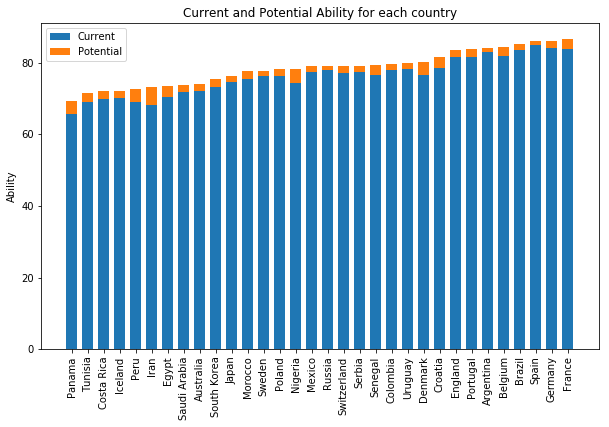

In [123]:
curr = grouped_wc_fifa18_stats["overall"]
pot = grouped_wc_fifa18_stats["Points_to_max_potential"]
ind = np.arange(32)
width = 0.7
plt.figure(figsize=(10,6))
p1 = plt.bar(ind,curr, width)
p2 = plt.bar(ind,pot, width, bottom=curr)

plt.ylabel('Ability')
plt.title('Current and Potential Ability for each country')
plt.xticks(ind,(grouped_wc_fifa18_stats.index),rotation=90)
plt.legend((p1[0], p2[0]), ('Current', 'Potential'))

plt.show()

Let's add another dataset statistics of teams

In [124]:
countries = pd.read_csv("./data/01 2018 World Cup Team Statistics.csv")

In [125]:
stats = countries[countries.team.isin(squads.Team)]
stats.head(2)

,team,team_code,group,Soccer_power_index,Offence_rating,Defence_rating,Average_age,Average_height,june_fifa_rank,june_fifa_points,all_time_fifa_ranking,total_world_cup_points,total_world_cup_matches_played,total_worldcup_match_wins,total_worldcup_match_draws,total_worldcup_match_losses,total_worldcup_match_goals_scored,total_worldcup_match_goals_against,total_worldcup_match_average_points,total_worldcup_appearances
0,Argentina,ARG,D,87.14876,2.57571,0.40808,28.4,179.4,5,1241,4.0,140.0,77.0,42.0,14.0,21.0,131.0,84.0,1.8,16.0
1,Australia,AUS,C,62.52712,1.80032,1.01758,26.9,181.3,36,718,46.0,9.0,13.0,2.0,3.0,8.0,11.0,26.0,0.7,4.0


We shall use the following variables of each country:

- Soccer Power Index
- Average Age
- Average Height
- Total World Cup Appearances
- Average goals scored per game
- Average goals conceded per game
- Potential

compare it with the opponent to build a poisson distribution model to predict the number of goals scored. 

In [126]:
stats = stats.set_index("team",drop=True)
stats = stats.fillna(0)
stats["Ave_goals_scored_per_game"] = stats['total_worldcup_match_goals_scored'] / stats['total_world_cup_matches_played']
stats["Ave_goals_conceded_per_game"] = stats['total_worldcup_match_goals_against'] / stats['total_world_cup_matches_played']
stats["Potential"] = 0
for i in stats.index:
    stats.loc[i,"Potential"] = grouped_wc_fifa18_stats.loc[i,"potential"]
    
#Normalise the variables
for i in ["Soccer_power_index","Average_age","Average_height","total_worldcup_appearances","Potential"]:
    stats[i] = stats[i].apply(lambda x: (x - stats[i].mean())/stats[i].std())

stats = stats.loc[:,['Soccer_power_index','Average_age','Average_height','total_worldcup_appearances',"Ave_goals_scored_per_game","Ave_goals_conceded_per_game","Potential"]]
stats = stats.fillna(0)  #for panama and iceland (First time WC)

In [127]:
stats.head(5)

,Soccer_power_index,Average_age,Average_height,total_worldcup_appearances,Ave_goals_scored_per_game,Ave_goals_conceded_per_game,Potential
team,,,,,,,
Argentina,1.200101,1.001439,-1.013921,1.483304,1.701299,1.090909,1.124970
Australia,-1.096003,-0.435811,-0.229165,-0.697681,0.846154,2.000000,-0.920256
Belgium,1.037655,-0.339995,0.803409,0.756309,1.268293,1.609756,1.159057
Brazil,1.689121,0.426539,-0.600891,2.210299,2.125000,0.980769,1.370397
Colombia,0.582766,-0.052545,-0.683497,-0.515932,1.444444,1.500000,0.211436


If you are interested in Soccer power index: http://www.espn.com/soccer/news/story/_/id/1873765

__Overall Method used:__

1) XGBoost would be used first to predict just the result of the matches (Win,Lose,Draw) for the group stages as I am only interested in the match result and who progresses. Real results up to 23/06 was used.

2) For the elimination rounds onwards, Logistic Regression (Lasso) model along with the poisson distribution would be used to predict the exact score.

* Weight of 0.8 would be given to the poisson distribution and weight of 0.2 would be given to 
  the Logistic Regression (Lasso)

Explanation on how to combine poisson distribution with Logistic Regression - predict the goals

We shall use the method and formula:

- __Base goals__ = Average goals scored from X against Y = max(Ave_goals_scored_per_game (X), Ave_goals_conceded_per_game(Y))

- __difference in countries__ = 0.4 (diff. in Soccer_Power_index) + 0.25 (diff. in Potential) + 0.25 (diff. in total_worldcup_appearances) + 0.05 (diff. in Average_height) - 0.05 * (diff. in Average_age)

    E.g diff in Soccer_Power_index --> Soccer_Power_index (X) - Soccer_Power_index (Y)

    Most weight (0.4) is given to difference in soccer power index because I feel it is the main determining factor of a soccer match.

    The potential of the players and the experience (total_worldcup_experience) would also play a important role in a match, especially in a semi-final/final.

    Least weights were given to the height (Headers advantage) and age (might be correlated with their stamina) as they might play a small part in some parts of the match. Age difference was "subtracted" because the younger the player is, there is a higher change of having more stamina, hence lower age is "better".

- __Mean goals scored from X against Y__ = Max(0, Base goals + difference in countries)

A poisson distribution would then be used to calculate the probability of them scoring 0,1,2,3,4,5,6 goals and combined with the classification models used to predict the number of goals for the match.

__Combining poisson distribution with logistic regression together__

1) Using the mean goals scored from Home side against Away side (Calculated as above), we can generate a list of probabilities of Home Side scoring 0 - 6 goals against the Away side.

    e.g [ Prob(0 goals), Prob(1 Goal), Prob(2Goals)....Prob(6 goals)]

2) We then use the Logistic Regression (Lasso) Model to generate a list of probabilities of Home Side scoring 0-6 goals against the Away Side.

    e.g [ Prob(0 goals), Prob(1 Goal), Prob(2Goals)....Prob(6 goals)]

3) We then combine the probabilities by multiplying the poisson probabilities by 0.8 and logistic regression probabilities by 0.2

    e.g Prob (0 goals) = 0.8 * Poisson Probability (0 goals) + 0.2 * Logisti Regression Probability(0 goals)
    etc
    etc

    (More weight is given to poisson probabilities as I feel they are more accurate and stronger compared to the logistic regression models).

4) Our prediction for the number of goals scored by the home side against the away side would be the one with the highest probability.

5) Repeat step 1-4 for the away side.

__Sources__

https://www.kaggle.com/angps95/fifa-world-cup-2018-prediction/

https://www.kaggle.com/zhangyue199/world-cup-winner-prediction-2018

https://www.kaggle.com/abecklas/fifa-world-cup/